In [2]:
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
ds = xr.open_dataset('/glade/u/home/deppenme/NCAR-pangeo-tutorial/notebooks/xarray/data/air_temperature.nc')

In [4]:
print(np.shape(ds.air))
ds

(2920, 25, 53)


<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

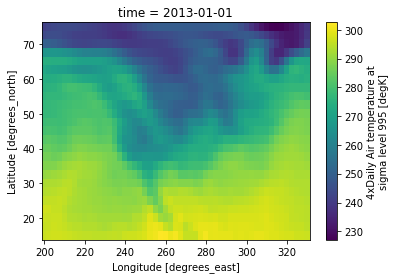

In [7]:
ds.air[0].plot()

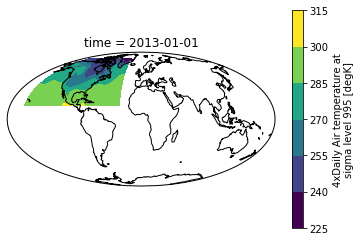

In [8]:
import cartopy.crs as ccrs
#ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
ax = plt.axes(projection=ccrs.Mollweide())
ds.air.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

In [9]:
modpath = '/glade/scratch/altuntas/archive/g.e20.G.TL319_t13.control.001_hfreq/ocn/hist/'
moddat = xr.open_dataset(modpath + 'g.e20.G.TL319_t13.control.001_hfreq.pop.h.0059-01-05.nc')

In [10]:
vertvel = moddat.WVEL
taux = moddat.TAUX
np.shape(taux)

(1, 2400, 3600)

ValueError: DataArray must be 2d

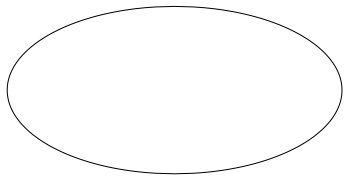

In [11]:
ax = plt.axes(projection=ccrs.Mollweide())
vertvel.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

In [13]:
moddat
np.shape(moddat.ULAT)

(2400, 3600)

In [14]:
np.where(moddat.ULAT==0)

(array([1181, 1181, 1181, ..., 1181, 1181, 1181]),
 array([   0,    1,    2, ..., 3597, 3598, 3599]))

In [16]:
np.max(moddat.ULONG[1181,-1])

<xarray.DataArray 'ULONG' ()>
array(-110.)
Coordinates:
    ULONG    float64 -110.0
    ULAT     float64 0.0
    TLONG    float64 ...
    TLAT     float64 ...

In [12]:
shift_taux = np.roll(taux, -400, axis=(2))

In [13]:
ulon_shift = np.roll(moddat.ULONG, -400, axis=1)
ulat_shift = np.roll(moddat.ULAT, -400, axis=1)

imin = np.where(ulon_shift[0,:]==-160)[0][0]
imax = np.where(ulon_shift[0,:]<=-120)[0][-1]
jmin = np.where(ulat_shift[:,0]==-15)[0]
jmax = np.where(ulat_shift[:,0]==15)[0]

print(imin)
print(imax)
print(jmin)

2699
2839
[]


/glade/u/home/deppenme/miniconda3/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less_equal
  """


In [14]:
plt.contourf(shift_taux[0,jmin:jmax,imin:imax])


TypeError: only integer scalar arrays can be converted to a scalar index

(2400, 3600)


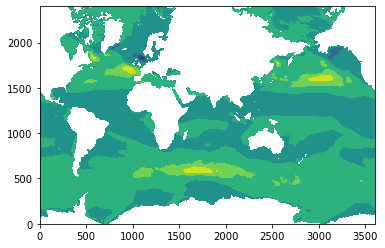

In [15]:
plt.contourf(moddat.TAUX[0,])
print(np.shape(moddat.TAUX[0]))
from mpl_toolkits.basemap import Basemap, cm

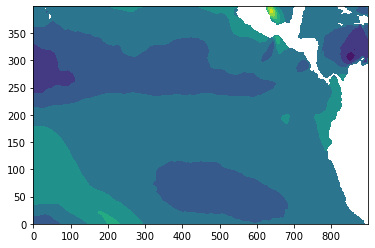

In [16]:
plt.contourf(shift_taux[0,1000:1400,2699:-1])

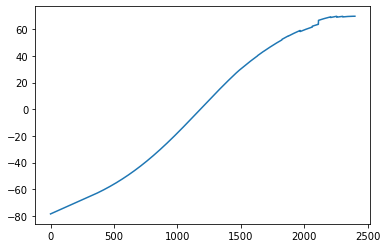

In [17]:
np.shape(ulat_shift[:,2699:])
plt.plot(np.nanmean(ulat_shift[:,2699:],axis=1))

In [ ]:
plt.plot(ulon_shift[1181,:])